# Assumtions of Linear Regression

## 1.Linear Relationship between the features and target:
Can be validated by plotting a scatter plot between the features and the target.

## 2.Little or no Multicollinearity between the features:
    
Let’s say we have Employee Salary data and want to build a linear regression model to predict Salary based on Job Level and Working Years.
Here is a formula of the linear regression model.
![](https://miro.medium.com/max/700/1*52jqQ7-WRd4UIuhymbAu6A.png)
And, by building the model we can find out the above parameters a, b, and c.
Let’s say we’ve got the following parameters.
![](https://miro.medium.com/max/700/1*KQqNQo0_WHeI8_sewh8UpQ.png)
This means that one level increase in the Job Level will have a 500 increase in the Salary when the Working Years stay the same. Similarly, a year increase in the Working Years will have a 100 increase in the Salary if the Job Level stays the same.
Now, as it turned out that the Job Level is actually decided based on the Working Years in this company and there is a formula they use to decide the Job Level like the below.
![](https://miro.medium.com/max/700/1*TbzXRB7VzbFjqMMPUtuVMQ.png)
This means that once we know the Working Years of an employee we know what is her Job Level.
For example, if this person’s working years is 10, then her job level can be calculated as 3 by using the above formula.
Now, if we had such a relationship between the Job Level and the Working years, the following three linear regression formulas would end up producing exactly the same salary value.
![](https://miro.medium.com/max/700/1*rvy--DdcQazeRQkELaDHSQ.png)
They all produce 4,000.
And this is a problem because the coefficients of the Job Level and the Working Years are not reliable.
One year increase in working years will make your salary $100 more? or $200 more? Or maybe $0!
Now that we know that multicollinearity is a problem to watch out for, how can we detect it methodically?

How to detect ? using correlation heatmap 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
boston_dataset=pd.read_csv("D:/python odyssey/Day2/boston_house_prices.csv")


In [3]:
boston_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
'''
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s
'''

'\nCRIM: Per capita crime rate by town\nZN: Proportion of residential land zoned for lots over 25,000 sq. ft\nINDUS: Proportion of non-retail business acres per town\nCHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\nNOX: Nitric oxide concentration (parts per 10 million)\nRM: Average number of rooms per dwelling\nAGE: Proportion of owner-occupied units built prior to 1940\nDIS: Weighted distances to five Boston employment centers\nRAD: Index of accessibility to radial highways\nTAX: Full-value property tax rate per $10,000\nPTRATIO: Pupil-teacher ratio by town\nB: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town\nLSTAT: Percentage of lower status of the population\nMEDV: Median value of owner-occupied homes in $1000s\n'

In [5]:
boston_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

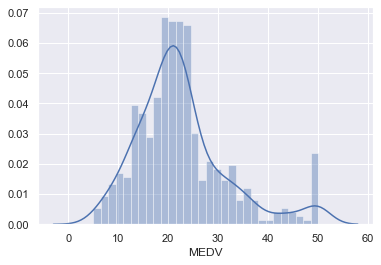

In [6]:
#Visualize
sns.set()
sns.distplot(boston_dataset["MEDV"],bins=30)

![](https://miro.medium.com/max/1200/1*LRstTjgZ-xJCBUp6V7o26A.jpeg)

# IQR = Q3 – Q1 
# IQR measure of how spread-out the values are.
'''
To find out if there are any outliers,we need ti find the IQR. 
There are fifteen data points, so the median will be at the eighth position:

(15 + 1) ÷ 2 = 8

Then Q2 = 14.6.

There are seven data points on either side of the median. The two halves are:

10.2,  14.1,  14.4.   14.4,  14.4,  14.5,  14.5

...and:

14.7,   14.7,  14.7,  14.9,  15.1,  15.9,   16.4

Q1 is the fourth value in the list, being the middle value of the first half of the list; and Q3 is the twelfth value, being th middle value of the second half of the list:

Q1 = 14.4

Q3 = 14.9

Then the IQR is given by:

IQR = 14.9 – 14.4 = 0.5

Outliers will be any points below Q1 – 1.5 ×IQR = 14.4 – 0.75 = 13.65 or above Q3 + 1.5×IQR = 14.9 + 0.75 = 15.65.

Then the outliers are at:

10.2, 15.9, and 16.4

These values are viewed as being too far from the central values to be reasonable.
'''

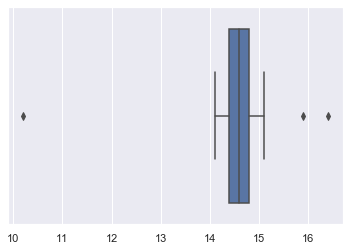

In [7]:
box_val=[10.2,  14.1,  14.4 ,  14.4,  14.4,  14.5,  14.5,  14.6,  14.7,   14.7,  14.7,  14.9,  15.1,  15.9,   16.4]
sns.boxplot(x=box_val)


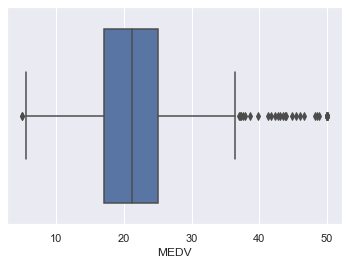

In [8]:
sns.boxplot(x=boston_dataset["MEDV"])

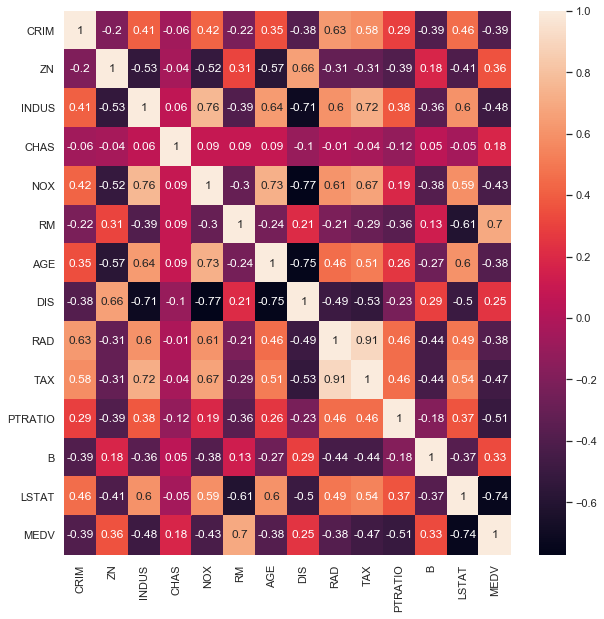

In [9]:
# Check if multicolinearity is present
correlation_matrix=boston_dataset.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix,annot=True)

- The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.
 - To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74) and PTRATIO has hihg negaive correlation with MED(-0.5).
 - choose only those feature has have corelation in range -1 to -0.5 and 0.5 -1
 
 -

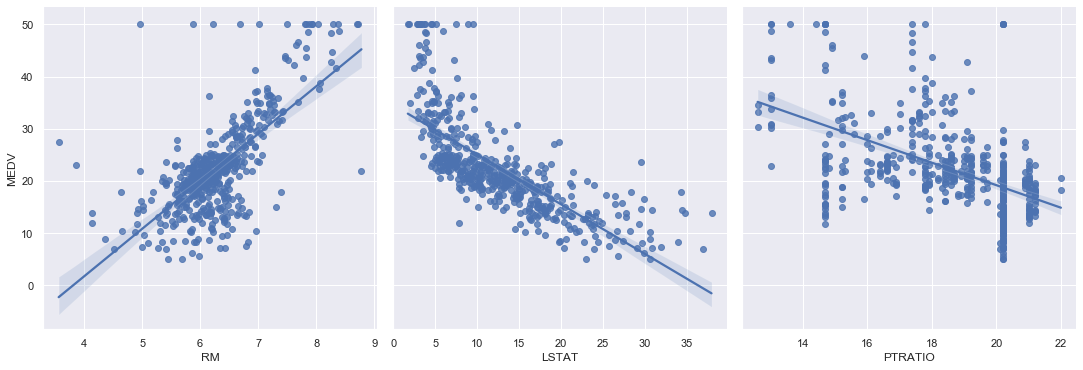

In [10]:
sns.pairplot(boston_dataset,x_vars=["RM","LSTAT","PTRATIO"],y_vars=["MEDV"],height=5, kind="reg")

In [11]:
features_tmp=boston_dataset.drop('MEDV',axis=1)
features=[col for col in features_tmp ]
print((features))

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [12]:
#X= boston_dataset.drop([["RM","LSTAT","PTRATIO"]]
X= boston_dataset.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B',"MEDV"],axis=1)                   
Y=boston_dataset["MEDV"]

 

In [13]:
X

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33
...,...,...,...
501,6.593,21.0,9.67
502,6.120,21.0,9.08
503,6.976,21.0,5.64
504,6.794,21.0,6.48


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)


# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)


In [42]:
def scores(y_true,y_pred):
    print('MAE :',mean_absolute_error(y_true,y_pred))
    print('MSE :',mean_squared_error(y_true,y_pred))
    print('RMSE :',np.sqrt(mean_squared_error(y_true,y_pred))) 
    # RMSE is not scaled to any particular values. lowers RMSE better model ;;;RMSE is a measure of spread that tells you how scattered (or not) your data is around the regression line
    
    print('R2 score:',r2_score(y_true,y_pred))
    #coefficient of determination is defined on [0,1], or [0%,100%] ; higher better hw much better it is to use regression line instead of mean 
    
print('Traning accuracy')
scores(Y_train,y_train_predict)

print()
print('Test accuracy')
scores(Y_test,y_test_predict)

print("\n Find the features and its weights")
print(pd.Series(lin_model.coef_,['RM',	'PTRATIO',	'LSTAT']))


Traning accuracy
MAE : 3.4818847083463322
MSE : 23.681938393213375
RMSE : 4.866409188838663
R2 score: 0.721859247739624

Test accuracy
MAE : 4.404434993909257
MSE : 41.67799012221684
RMSE : 6.4558492951909
R2 score: 0.48816420156925056

 Find the features and its weights
RM         4.264947
PTRATIO   -1.136547
LSTAT     -0.575521
dtype: float64


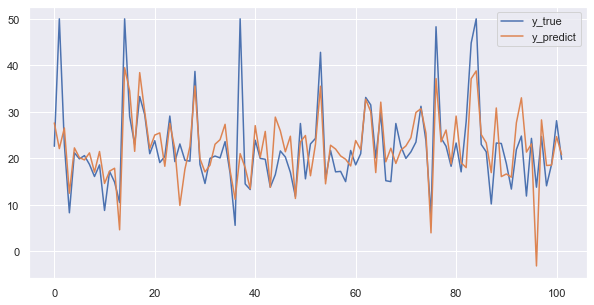

In [30]:
x_points=list(range(len(Y_test)))
plt.figure(figsize=(10,5))
plt.plot(x_points,Y_test,label="y_true")
plt.plot(x_points,y_test_predict,label="y_predict")
plt.legend()

In [17]:
y_test_predict.shape

(102,)

In [20]:
list(range(5))

[0, 1, 2, 3, 4]